In [93]:
import sys
import os
import numpy as np
import pickle
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf
import scipy.io as sio


In [12]:
grid=netcdf("/sugon7/zsm/croco_tools_xmd1204/CROCO_FILES/TWS2/TWS2_rot2.nc",'r')
his=netcdf("/leader/user/zsm/TWS2_400600/TIDE/U3/CCL1_his_0020.nc",'r')

In [41]:
mask=grid['mask_rho'][:]
xi=grid['xi_rho'][:]
eta=grid['eta_rho'][:]
h=grid['h'][:]
temp=his['temp'][1,-1,:,:]
masksize=np.zeros_like(mask)

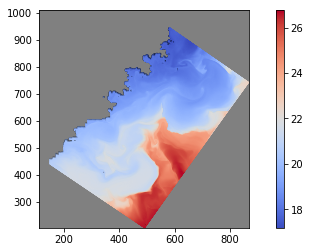

In [30]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_facecolor('grey')
cr1=ax.pcolormesh(xi,eta,temp,shading='gouraud',cmap=plt.cm.coolwarm)
plt.colorbar(cr1,ax=ax,  orientation='vertical', pad=0.1,aspect=30,shrink=1)

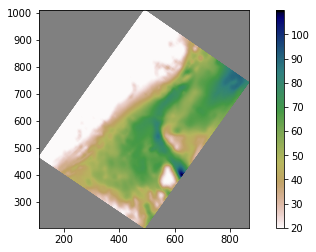

In [29]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_facecolor('grey')
cr1=ax.pcolormesh(xi,eta,h,shading='gouraud',cmap=plt.cm.gist_earth_r)
plt.colorbar(cr1,ax=ax, orientation='vertical', pad=0.1,aspect=30,shrink=1)

# set box particles

In [46]:
JJ1=300
JJ2=400
II1=150
II2=190

In [ ]:
masksize=np.zeros_like(mask)
masksize[JJ1:JJ2,II1:II2]=1
# find(masksize*mask)=1
del pos
pos=np.argwhere(masksize*mask==1)
pos.shape
n_total = pos.shape[0]  
n_select = 500  

random_indices = np.random.choice(n_total, size=n_select, replace=False)
selected_points = pos[random_indices]
selected_points.shape

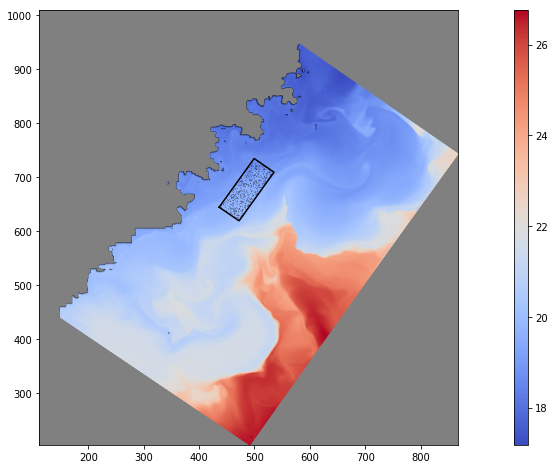

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('grey')
cr1=ax.pcolormesh(xi,eta,temp,shading='gouraud',cmap=plt.cm.coolwarm)
plt.colorbar(cr1,ax=ax,  orientation='vertical', pad=0.1,aspect=30,shrink=1)
plt.plot(xi[selected_points[:,0],selected_points[:,1]],eta[selected_points[:,0],selected_points[:,1]],linestyle='none',marker='o',
         color='k',markersize=0.1)
plt.plot([xi[JJ1,II1],xi[JJ1,II2],xi[JJ2,II2],xi[JJ2,II1],xi[JJ1,II1]],
         [eta[JJ1,II1],eta[JJ1,II2],eta[JJ2,II2],eta[JJ2,II1],eta[JJ1,II1]],color='k')


In [90]:
px=xi[selected_points[:,0],selected_points[:,1]]
py=eta[selected_points[:,0],selected_points[:,1]]


In [91]:
px.shape
py.shape

(500,)

In [94]:
sio.savemat('/home/zsm/PY_PART_ROMS-Dauhajre/part_in/boxpart.mat',{'px':px,'py':py})

# another method :change_xi, eta

In [112]:
# del grid
# grid=netcdf("/sugon7/zsm/croco_tools_xmd1204/CROCO_FILES/TWS2/TWS2_rot2.nc",'w')
# xi=(np.arange(421)+1)
# eta=(np.arange(601)+1)
# xi1,eta1=np.meshgrid(xi,eta)
# grid['XI_RHO'][:]=xi1
# grid['eta_rho'][:]=eta1
# grid.close()

In [113]:
# del grid

# use matlab

In [ ]:
# fname='/sugon7/zsm/croco_tools_xmd1204/CROCO_FILES/TWS2/TWS2_rot2.nc'
# nc=netcdf(fname,'w')
# [xi,eta]=meshgrid(1:421,1:601);
# nc{'xi_rho'}(:)=xi;
# nc{'eta_rho'}(:)=eta;
# close(nc)